In [ ]:
#!pip install palmerpenguins

from palmerpenguins import load_penguins
penguins = load_penguins()
from siuba import group_by, summarize, _
(penguins
  >> group_by(_.species)
  >> summarize(n = _.species.count())
)

,species,n
0,Adelie,152
1,Chinstrap,68
2,Gentoo,124


[https://twosidesdata.netlify.app/2019/03/23/exploratory-data-analysis-basic-pandas-and-dplyr/](https://twosidesdata.netlify.app/2019/03/23/exploratory-data-analysis-basic-pandas-and-dplyr/)

In [ ]:
!pip install tidytext siuba plotnine

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3904 sha256=f1ccb5d2333a5a4bdeaad6a990e38bca9a3916d44af15afa3a086332d2f4a3e2
  Stored in directory: c:\users\sol-nhl\appdata\local\pip\cache\wheels\07\03\c0\f73eeef462dd66dbca0288a338fcbcdc78e3588937ccc907d8
Successfully built tidytext


In [ ]:
import nltk

In [ ]:
nltk.download("punkt")
nltk.download("popular")

[nltk_data] Downloading package punkt to C:\Users\sol-
[nltk_data]     nhl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\sol-
[nltk_data]    |     nhl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to C:\Users\sol-
[nltk_data]    |     nhl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to C:\Users\sol-
[nltk_data]    |     nhl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to C:\Users\sol-
[nltk_data]    |     nhl\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to C:\Users\sol-
[nltk_data]    |     nhl\AppData\Roaming\nlt

True

In [ ]:
import pandas as pd

pd.set_option("display.max_rows", 6)

zen = """
The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
"""

zen_split = zen.splitlines()


df = pd.DataFrame({
    "zen": zen_split,
    "line": list(range(len(zen_split)))
})

df

,zen,line
0,,0
1,"The Zen of Python, by Tim Peters",1
2,,2
...,...,...
19,"If the implementation is hard to explain, it's...",19
20,"If the implementation is easy to explain, it m...",20
21,Namespaces are one honking great idea -- let's...,21


In [ ]:
from tidytext import unnest_tokens

unnest_tokens(df, "word", "zen")

,line,word
0,0,NaN
1,1,the
1,1,zen
...,...,...
21,21,more
21,21,of
21,21,those


In [ ]:
from tidytext import unnest_tokens, bind_tf_idf 
from siuba import _, count, arrange

(df
  >> unnest_tokens(_.word, _.zen)
  >> count(_.line, _.word)
  >> bind_tf_idf(_.word, _.line, _.n)
  >> arrange(-_.tf_idf)
)

,line,word,n,tf,idf,tf_idf
37,9,counts,1,0.500000,2.995732,1.497866
38,9,readability,1,0.500000,2.995732,1.497866
56,13,explicitly,1,0.333333,2.995732,0.998577
...,...,...,...,...,...,...
99,18,is,1,0.125000,0.693147,0.086643
112,19,is,1,0.090909,0.693147,0.063013
124,20,is,1,0.076923,0.693147,0.053319


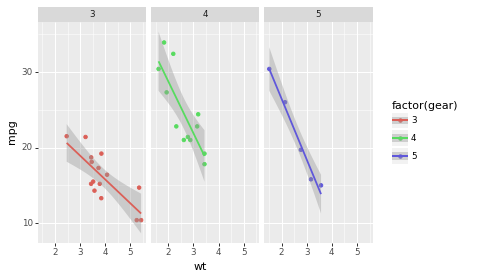

<ggplot: (142548366870)>

In [ ]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

In [ ]:
from palmerpenguins import load_penguins
penguins = load_penguins()
from siuba import select
(penguins
  >> select(-_.isalpha(), _.species)
  >> group_by(_.species)
  >> summarize(
      bill_length_mm = _.bill_length_mm.mean(),
      bill_depth_mm = _.bill_depth_mm.mean(),
      flipper_length_mm = _.flipper_length_mm.mean(),
      body_mass_g = _.body_mass_g.mean()
  )
)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.791391,18.346358,189.953642,3700.662252
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.504878,14.982114,217.186992,5076.016260


C:\Users\sol-nhl\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


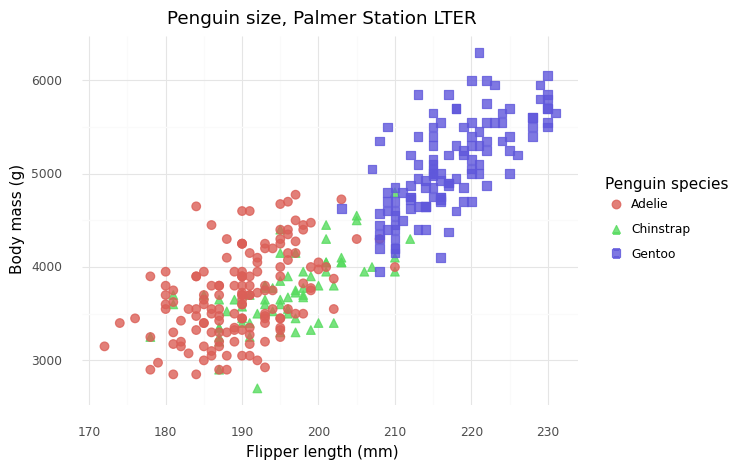

<ggplot: (142549317563)>

In [ ]:
from siuba import *
from plotnine import *
from palmerpenguins import load_penguins
penguins = load_penguins()
(penguins
 # using siuba pipe
 >> ggplot(aes(x = 'flipper_length_mm', y = 'body_mass_g'))
 # creating plotnine plot
  + geom_point(aes(color = 'species', shape = 'species'),
             size = 3,
             alpha = 0.8)
  + theme_minimal()
  + labs(title = "Penguin size, Palmer Station LTER",
         #subtitle = "Flipper length and body mass for Adelie, Chinstrap, and Gentoo Penguins",
        x = "Flipper length (mm)",
        y = "Body mass (g)",
        color = "Penguin species",
        shape = "Penguin species"))

In [ ]:
!pip install pydataset

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939431 sha256=3c770867bd74113637a3f8154cec120f3ebb196ffd085bcfeca5bac70c77a3e3
  Stored in directory: c:\users\sol-nhl\appdata\local\pip\cache\wheels\d7\e5\36\85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [ ]:
from pydataset import data as pyds

initiated datasets repo at: C:\Users\sol-nhl\.pydataset/


In [ ]:
pyds.